In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv('Base Paper Dataset.csv')
df.head()

District_Name       Season     Area  Production Crop
0  NORTH AND MIDDLE ANDAMAN  Rabi           294.5        90.8  Tur
1            SOUTH ANDAMANS  Rabi            20.5        13.2  Tur
2                 ANANTAPUR  Kharif       21400.0      2600.0  Tur
3                 ANANTAPUR  Kharif       27400.0      9100.0  Tur
4                 ANANTAPUR  Kharif       30693.0      7888.0  Tur

In [72]:
# Handling Missing Values
df['Production'].fillna(df['Production'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124969 entries, 0 to 124968
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District_Name  124969 non-null  object 
 1   Season         124969 non-null  object 
 2   Area           124969 non-null  float64
 3   Production     124969 non-null  float64
 4   Crop           124969 non-null  object 
dtypes: float64(2), object(3)
memory usage: 4.8+ MB


In [73]:
# Removing Duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121362 entries, 0 to 124968
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District_Name  121362 non-null  object 
 1   Season         121362 non-null  object 
 2   Area           121362 non-null  float64
 3   Production     121362 non-null  float64
 4   Crop           121362 non-null  object 
dtypes: float64(2), object(3)
memory usage: 5.6+ MB


In [74]:
# Handling Outliers using the IQR method
Q1 = df[['Area', 'Production']].quantile(0.25)
Q3 = df[['Area', 'Production']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Area', 'Production']] < (Q1 - 1.5 * IQR)) | (df[['Area', 'Production']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96197 entries, 0 to 124968
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  96197 non-null  object 
 1   Season         96197 non-null  object 
 2   Area           96197 non-null  float64
 3   Production     96197 non-null  float64
 4   Crop           96197 non-null  object 
dtypes: float64(2), object(3)
memory usage: 4.4+ MB


In [75]:
from sklearn.preprocessing import OneHotEncoder
# Encoding Categorical Variables
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(df[['District_Name', 'Season', 'Crop']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['District_Name', 'Season', 'Crop']))
encoded_df.head()

C:\Users\ur_mi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


District_Name_24 PARAGANAS NORTH  District_Name_24 PARAGANAS SOUTH  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   District_Name_ADILABAD  District_Name_AGAR MALWA  District_Name_AGRA  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     0.0                       0.0                 0.0   
4                     0.0                       0.0                 0.0   

   District_Name_AHMADABAD  District_Name_AHMEDNAGAR  District_Name_AIZAWL  \
0                      0.0                       0.0                   0.0   
1                      0.0                       0.0                   0.0   
2                      0.0                       0.0                   0.0   
3                      0.0                       0.0                   0.0   
4                      0.0                       0.0                   0.0   

   District_Name_AJMER  District_Name_AKOLA  ...  Crop_Paddy  Crop_Ragi  \
0                  0.0                  0.0  ...         0.0        0.0   
1                  0.0                  0.0  ...         0.0        0.0   
2                  0.0                  0.0  ...         0.0        0.0   
3                  0.0                  0.0  ...         0.0        0.0   
4                  0.0                  0.0  ...         0.0        0.0   

   Crop_Rice  Crop_Sesamum  Crop_Soyabean  Crop_Sugarcane  Crop_Sunflower  \
0        0.0           0.0            0.0             0.0             0.0   
1        0.0           0.0            0.0             0.0             0.0   
2        0.0           0.0            0.0             0.0             0.0   
3        0.0           0.0            0.0             0.0             0.0   
4        0.0           0.0            0.0             0.0             0.0   

   Crop_Tur  Crop_Urad  Crop_Wheat  
0       1.0        0.0         0.0  
1       1.0        0.0         0.0  
2       1.0        0.0         0.0  
3       1.0        0.0         0.0  
4       1.0        0.0         0.0  

[5 rows x 669 columns]

In [76]:
# Combine the encoded columns with the original dataset
df_cleaned = df.drop(columns=['District_Name', 'Season', 'Crop']).reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)
df_cleaned.head(), df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96197 entries, 0 to 96196
Columns: 671 entries, Area to Crop_Wheat
dtypes: float64(671)
memory usage: 492.5 MB


(      Area  Production  District_Name_24 PARAGANAS NORTH  \
 0    294.5        90.8                               0.0   
 1     20.5        13.2                               0.0   
 2  21400.0      2600.0                               0.0   
 3  27400.0      9100.0                               0.0   
 4     35.0         9.0                               0.0   
 
    District_Name_24 PARAGANAS SOUTH  District_Name_ADILABAD  \
 0                               0.0                     0.0   
 1                               0.0                     0.0   
 2                               0.0                     0.0   
 3                               0.0                     0.0   
 4                               0.0                     0.0   
 
    District_Name_AGAR MALWA  District_Name_AGRA  District_Name_AHMADABAD  \
 0                       0.0                 0.0                      0.0   
 1                       0.0                 0.0                      0.0   
 2             

In [77]:
feature_names = df_cleaned.drop(columns=['Production']).columns.tolist()

In [78]:
X = df_cleaned.drop(columns='Production')
y = df_cleaned['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

In [80]:
y_pred = best_dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")

MSE: 13712579.524420679, MAE: 1638.1390082058747, R2: 0.7781645913165818


In [81]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [82]:
# Model interpretation with LIME
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['Production'], mode='regression')
exp = explainer.explain_instance(X_test.iloc[0].values, best_dt.predict, num_features=10)
exp.show_in_notebook()

C:\Users\ur_mi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [83]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


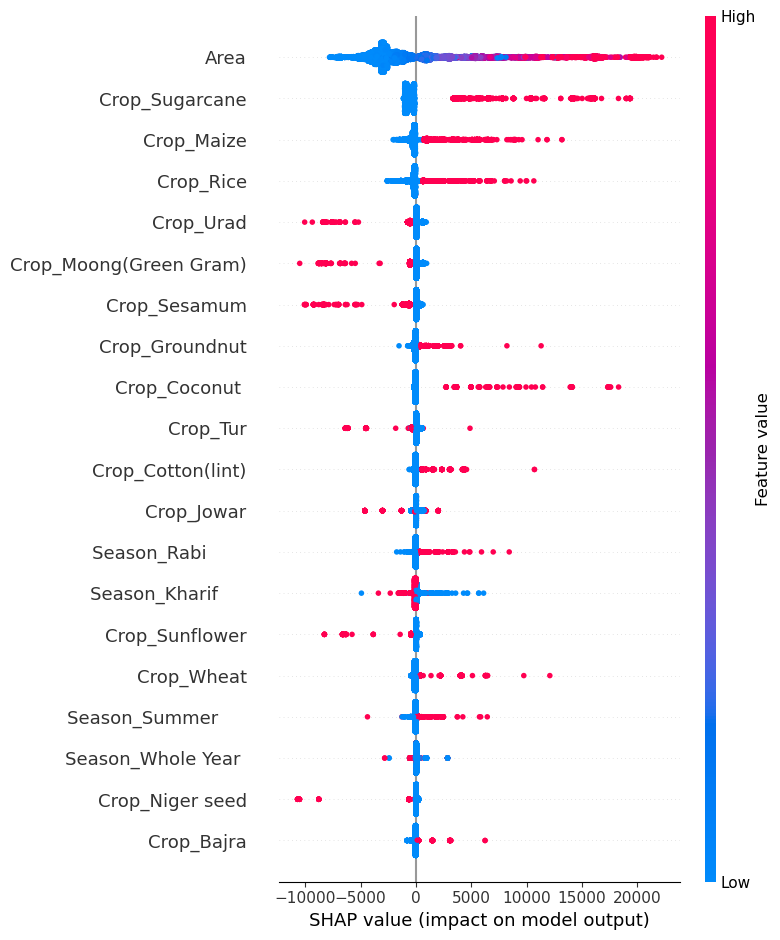

In [84]:
import shap
# Model interpretation with SHAP
explainer = shap.TreeExplainer(best_dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

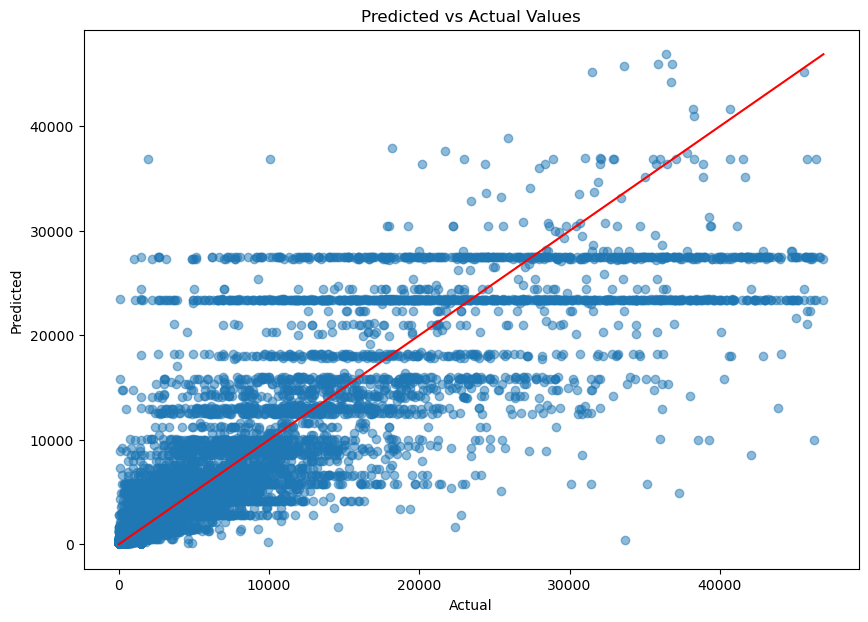

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

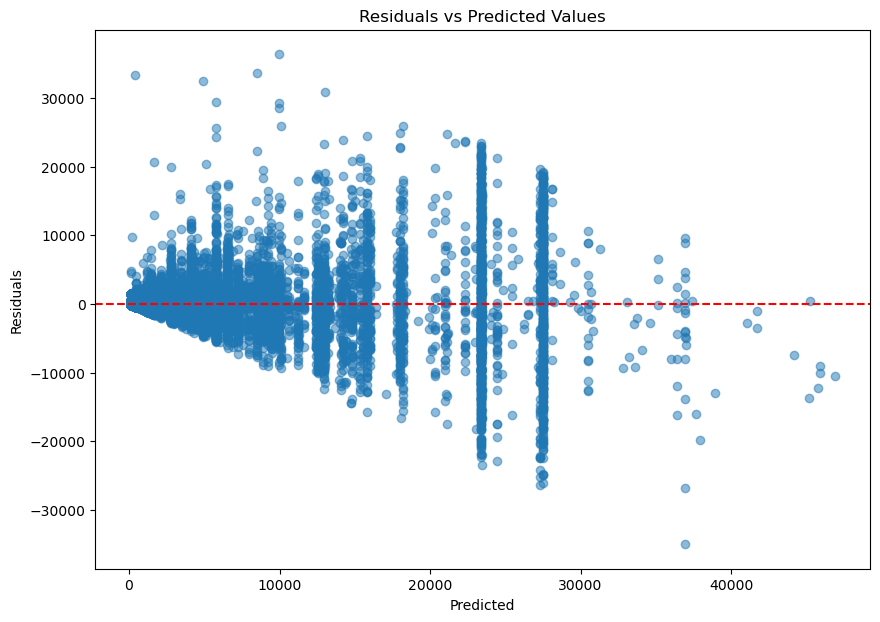

In [86]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 7))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

C:\Users\ur_mi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


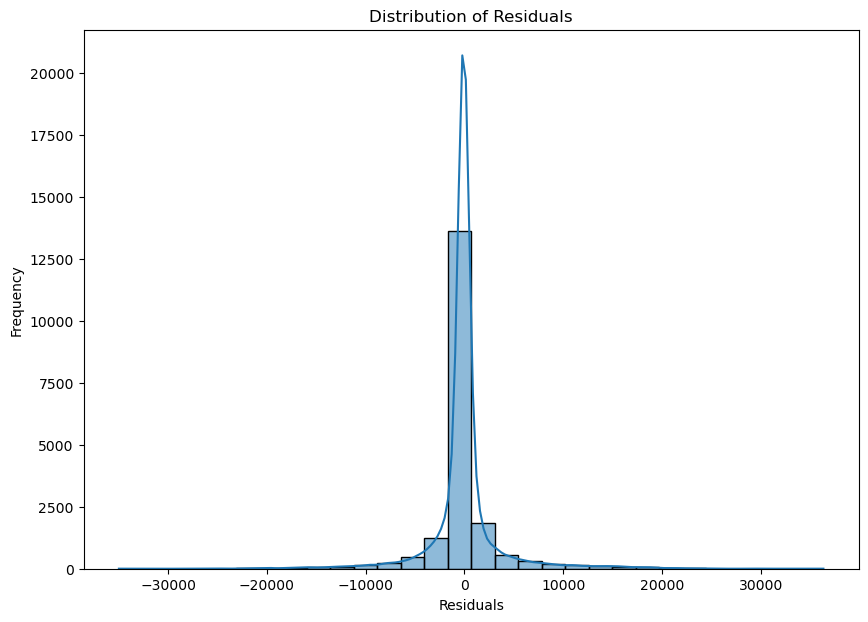

In [87]:
# Histogram of residuals
plt.figure(figsize=(10, 7))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()